In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine

In [2]:
wines = load_wine()
dir(wines)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
df_wine = pd.DataFrame(wines.data,columns=wines.feature_names)
df_wine['target'] = wines.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.iloc[:,:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


BOXPLOT TO CHECK THE OUTPUT LABELS

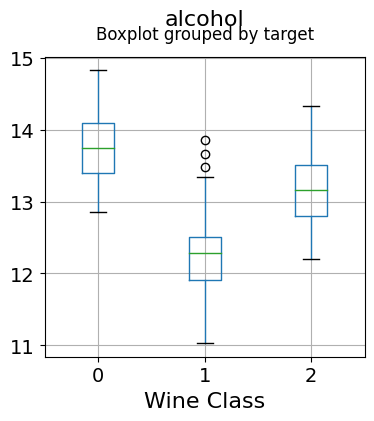

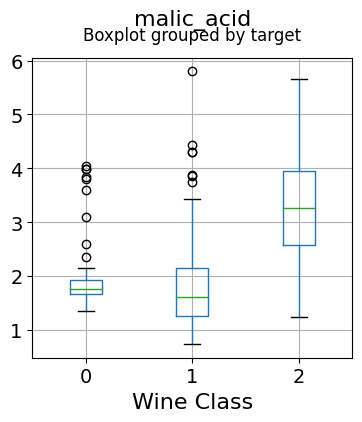

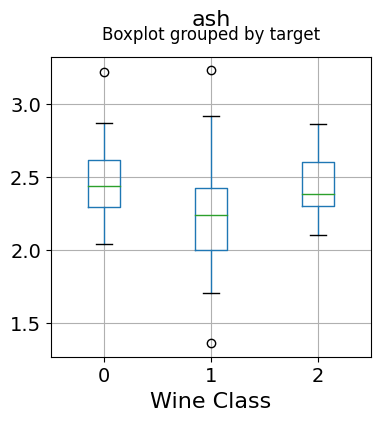

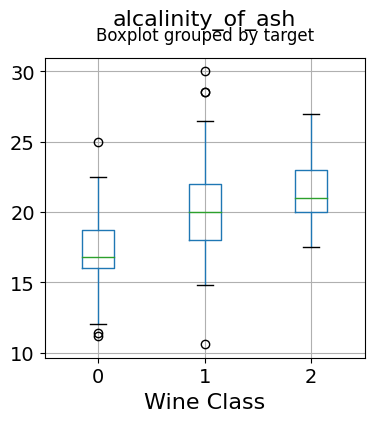

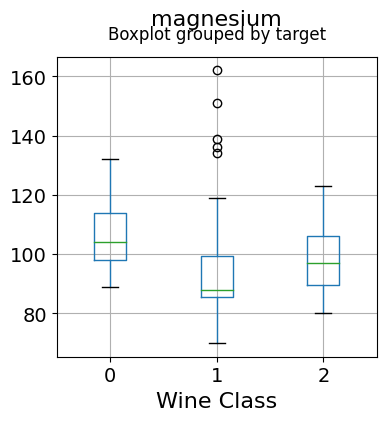

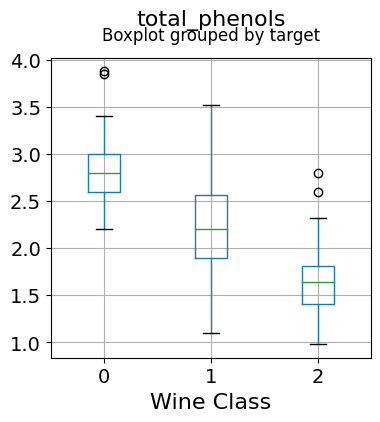

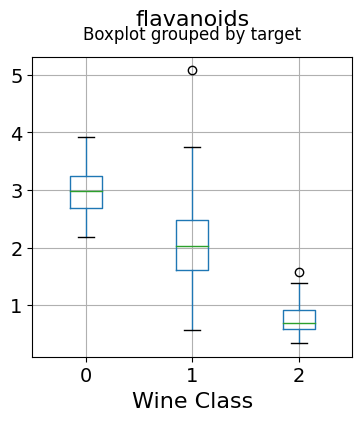

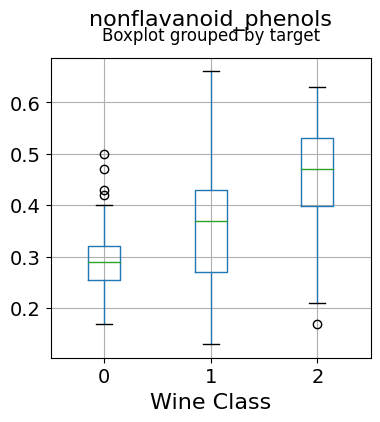

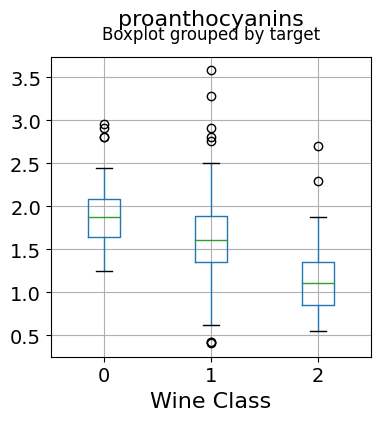

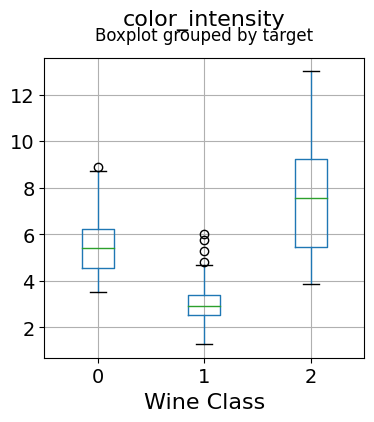

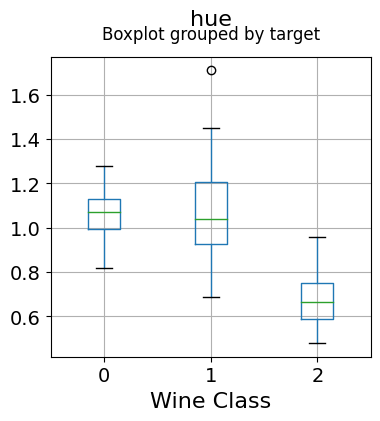

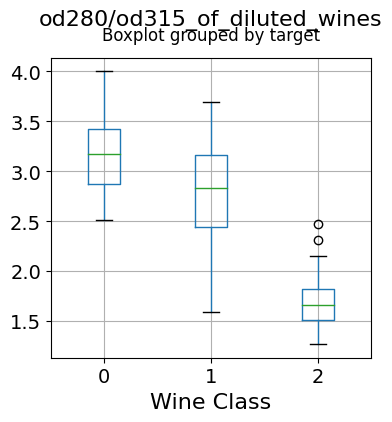

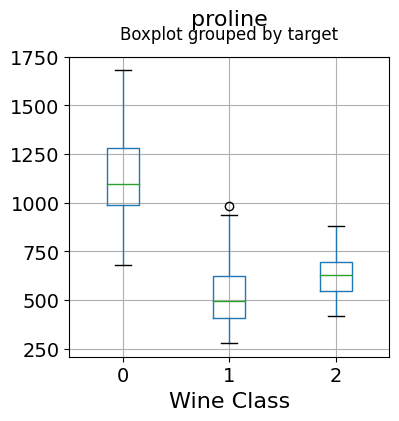

In [9]:
for c in df_wine.columns[:-1]:
    df_wine.boxplot(c,by='target',figsize=(4,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize = 16)
    plt.xlabel("Wine Class",fontsize=16)

Class Separation of Wine Using 2 Features

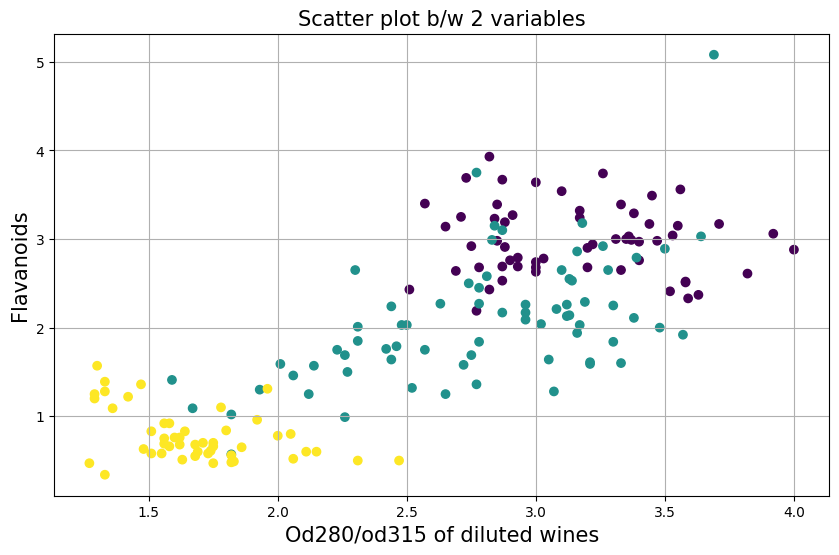

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df_wine['od280/od315_of_diluted_wines'],df_wine['flavanoids'],c=df_wine['target'])
plt.grid(True)
plt.title('Scatter plot b/w 2 variables', fontsize = 15)
plt.xlabel("Od280/od315 of diluted wines",fontsize = 15)
plt.ylabel("Flavanoids", fontsize = 15)
plt.show()

PLOT THE CORRELATION MATRIX

C:\Users\Polina\AppData\Local\Temp\ipykernel_9152\837540275.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=12)
C:\Users\Polina\AppData\Local\Temp\ipykernel_9152\837540275.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=12)


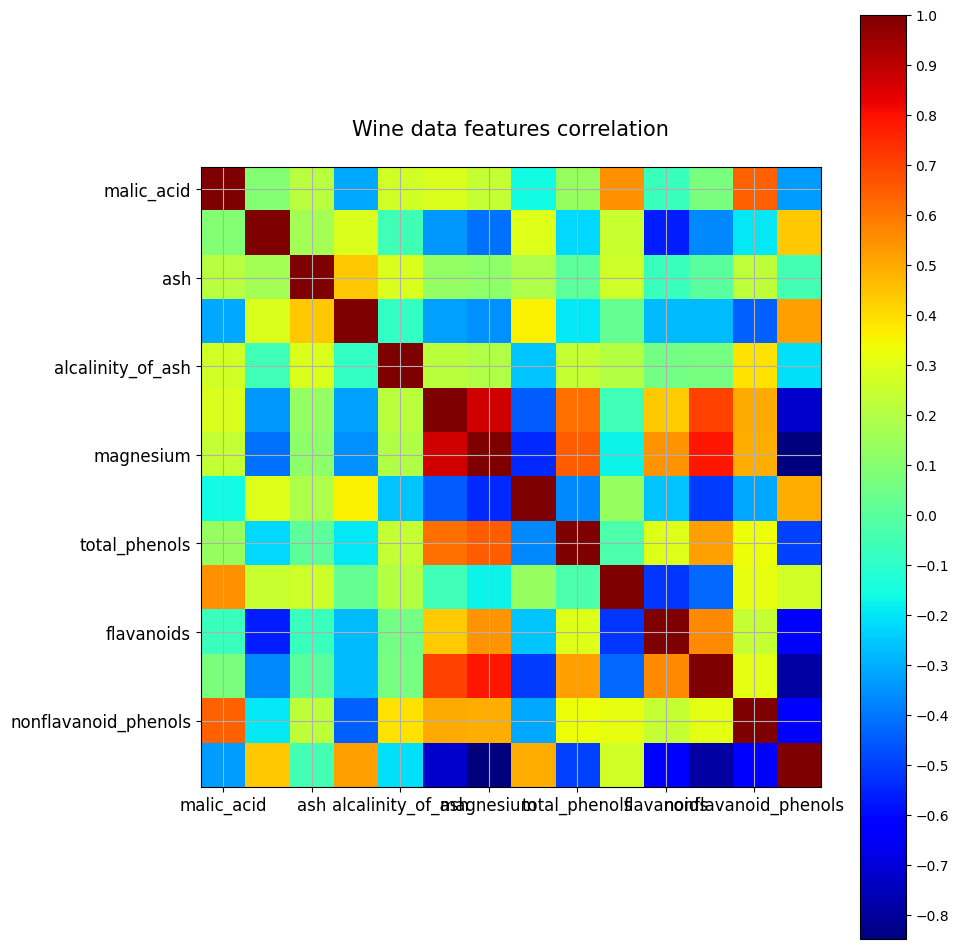

In [24]:
from matplotlib import cm as cm 

def correlation_matrix(df):
    fig = plt.figure(figsize=(10,12))
    ax1 = fig.add_subplot(111)
    cmap = plt.colormaps.get_cmap('jet')
    cax = ax1.imshow(df.corr(),interpolation='nearest',cmap=cmap)
    ax1.grid(True)
    plt.title("Wine data features correlation\n",fontsize=15)
    labels = df.columns
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
    fig.colorbar(cax,ticks=[0.1*i for i in range(-11,11)])
    plt.show()
    
correlation_matrix(df_wine)

NORMALIZE THE DATA FOR PCA

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = df_wine.drop('target',axis=1)
y = df_wine['target']

x_scaled = scaler.fit_transform(x)
dfx = pd.DataFrame(data=x_scaled,columns=df_wine.columns[:-1])
dfx.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [27]:
dfx.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


 Import the PCA Module and Plot the Variance Ratio

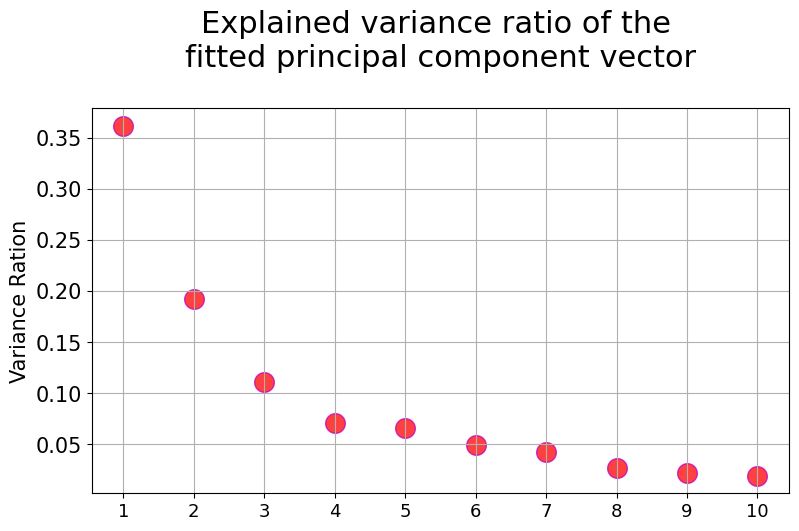

In [36]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

dfx_pca = pca.fit(dfx)

plt.figure(figsize=(9,5))
plt.scatter(x = [i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],y=dfx_pca.explained_variance_ratio_,s=200,alpha=0.75,c='red',edgecolors='m')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=22)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=13)
plt.yticks(fontsize = 15)
plt.ylabel("Variance Ration",fontsize=15)
plt.show()

In [37]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head()

,0,1,2,3,4,5,6,7,8,9
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


Visualize the Wine Classes Using the First Two Principal Components

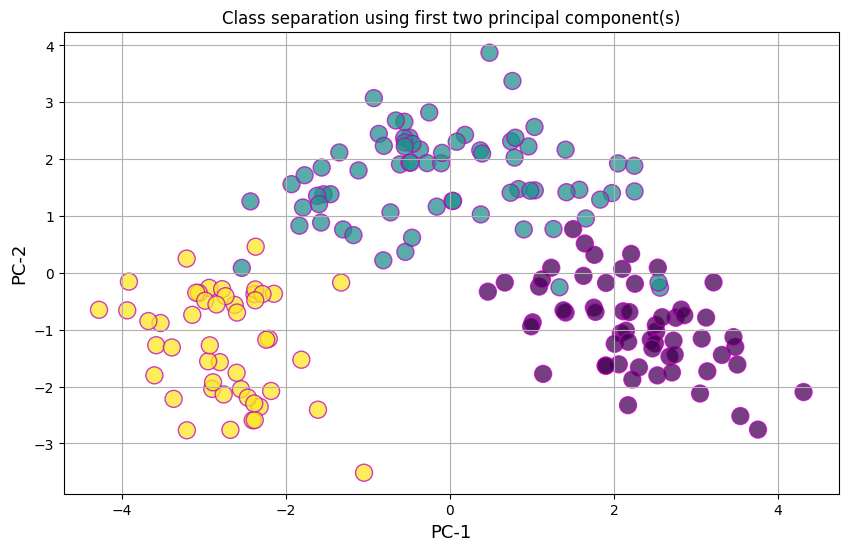

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df_wine['target'],edgecolors='m',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal component(s)")
plt.xlabel("PC-1", fontsize=13)
plt.ylabel("PC-2",fontsize = 13)
plt.show()

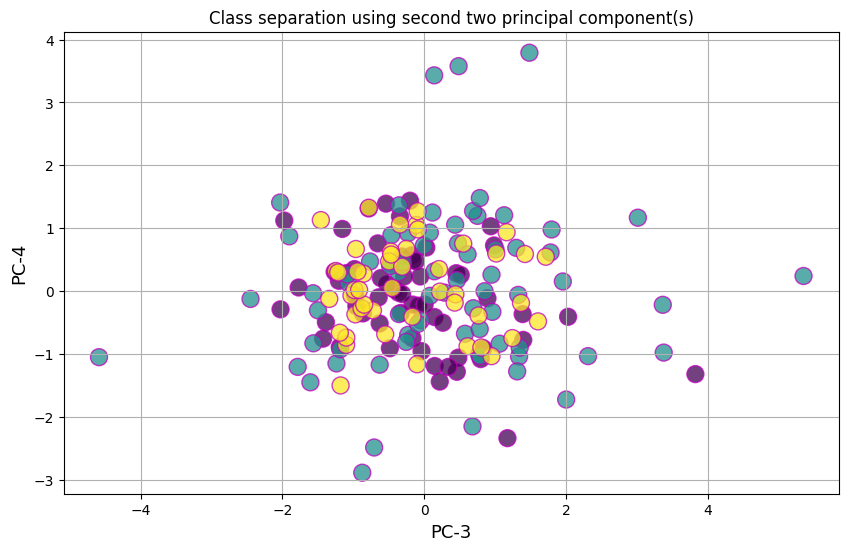

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[2],dfx_trans[3],c=df_wine['target'],edgecolors='m',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using second two principal component(s)")
plt.xlabel("PC-3", fontsize=13)
plt.ylabel("PC-4",fontsize = 13)
plt.show()

CHOOSING THE BEST MODEL FOR PREDICTION CLASS

In [60]:
from sklearn.model_selection import train_test_split

x_pca = pca.fit_transform(x_scaled)

x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [61]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.model_selection import GridSearchCV

model_params = {
    'SVM' : {
        'model' : SVC(),
        'params' : {
            'C' : [1,10,20,30],
            'gamma' : ['auto','scale'],
            'kernel' : ['linear','rbf']
        }
    },
    'Random_Forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10,20],
            'max_depth' : [5,10,12]
        }
    },
    'LogRegress' : {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,5,10,20],
            'max_iter' : [100,200,500,1000]
        }
    },
     'KNeibh' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,4,5,10,13]
        }
    },
    
}

In [65]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train_pca,y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df.sort_values(by='best_score',ascending=False)

,model,best_score,best_params
2,LogRegress,0.985961,"{'C': 1, 'max_iter': 100}"
0,SVM,0.971921,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
1,Random_Forest,0.965025,"{'max_depth': 5, 'n_estimators': 10}"
3,KNeibh,0.964532,{'n_neighbors': 5}


ACORDING TO RESULT ABOVE WE ARE GOING TO TRAIN OUR MODEL WITH SVM ALGORITHM

In [66]:
model = LogisticRegression(C=1,max_iter=100)
model.fit(x_train_pca,y_train)
y_pred = model.predict(x_test_pca)

CREATING COFUSION MATRIX AND CLASSIFICATION REPORT

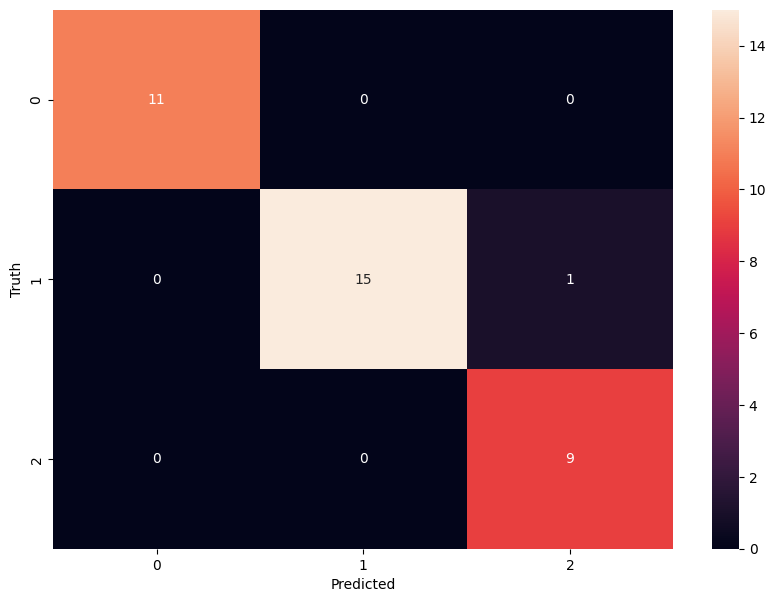

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

